In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import scipy as sp
import scipy.stats.distributions
import os

exam_data = pd.read_csv("StudentsPerformance.csv")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [45]:
exam_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [46]:
def gender_val(gender):
    if gender == "male":
        return 1
    return 0
gender_func =np.vectorize(gender_val)

In [47]:
exam_data['summary_score'] = exam_data['math score'] + exam_data['reading score'] + exam_data['writing score']
#exam_data = exam_data.assign(summary_score = exam_data['math score'] + exam_data['reading score'] + exam_data['writing score'] )
#exam_data = exam_data.assign(gender = gender_func(exam_data.gender) )

In [48]:
exam_data.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,summary_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
6,female,group B,some college,standard,completed,88,95,92,275
7,male,group B,some college,free/reduced,none,40,43,39,122


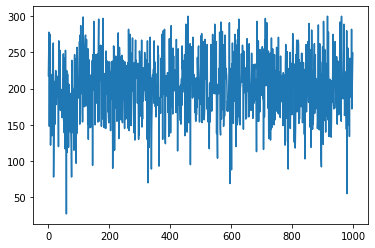

In [49]:
plt.plot(exam_data.summary_score)
plt.show()

In [50]:
exam_data[exam_data.summary_score < 50]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,summary_score
59,female,group C,some high school,free/reduced,none,0,17,10,27


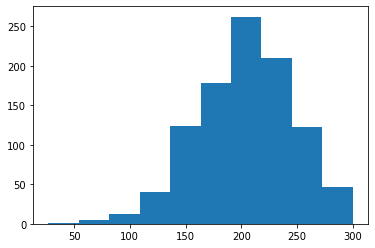

In [51]:
fig, ax = plt.subplots()
ax.hist(exam_data.summary_score)
plt.show()

Гипотезы:
1) Зависимость средней оценки от пола

In [52]:
exam_data.groupby('test preparation course')['summary_score'].mean()

test preparation course
completed    218.008380
none         195.116822
Name: summary_score, dtype: float64